# Keystroke Dynamics

### Dataset:
The dataset is taken from http://www.vmonaco.com/keystroke-datasets.
Specifically from https://ms.sapientia.ro/~manyi/keystroke.html.

* Number of subjects: 42 (24 male, 18 female)
* Password: .tie5Roanl
* Keys: . t i e [123?] 5 [abc] [Shift] R [Shift] o a n l

### To read:
* https://appliedmachinelearning.blog/2017/07/26/user-verification-based-on-keystroke-dynamics-python-code/

## 1. Loading data

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np

In [2]:
data = arff.loadarff('dataset2_norm.arff')
df = pd.DataFrame(data[0])

In [3]:
df.columns

Index(['holdtime1', 'holdtime2', 'holdtime3', 'holdtime4', 'holdtime5',
       'holdtime6', 'holdtime7', 'holdtime8', 'holdtime9', 'holdtime10',
       'holdtime11', 'holdtime12', 'holdtime13', 'holdtime14', 'downdown1',
       'downdown2', 'downdown3', 'downdown4', 'downdown5', 'downdown6',
       'downdown7', 'downdown8', 'downdown9', 'downdown10', 'downdown11',
       'downdown12', 'downdown13', 'updown1', 'updown2', 'updown3', 'updown4',
       'updown5', 'updown6', 'updown7', 'updown8', 'updown9', 'updown10',
       'updown11', 'updown12', 'updown13', 'pressure1', 'pressure2',
       'pressure3', 'pressure4', 'pressure5', 'pressure6', 'pressure7',
       'pressure8', 'pressure9', 'pressure10', 'pressure11', 'pressure12',
       'pressure13', 'pressure14', 'fingerarea1', 'fingerarea2', 'fingerarea3',
       'fingerarea4', 'fingerarea5', 'fingerarea6', 'fingerarea7',
       'fingerarea8', 'fingerarea9', 'fingerarea10', 'fingerarea11',
       'fingerarea12', 'fingerarea13', 'fingerar

In [4]:
len(df.columns)

72

In [5]:
df.head()

,holdtime1,holdtime2,holdtime3,holdtime4,holdtime5,holdtime6,holdtime7,holdtime8,holdtime9,holdtime10,...,fingerarea9,fingerarea10,fingerarea11,fingerarea12,fingerarea13,fingerarea14,meanholdtime,meanpressure,meanfingerarea,user_id
0,0.538793,0.462222,0.362903,0.274510,0.300366,0.384259,0.430147,0.467290,0.240,0.374429,...,0.296296,0.296296,0.222222,0.211470,0.283154,0.185185,0.447030,0.387546,0.364089,b'1'
1,0.435345,0.382222,0.354839,0.285714,0.106227,0.328704,0.363971,0.485981,0.344,0.365297,...,0.259259,0.185185,0.185185,0.354839,0.211470,0.148148,0.423762,0.445704,0.369322,b'1'
2,0.478448,0.453333,0.399194,0.338936,0.340659,0.375000,0.338235,0.345794,0.296,0.365297,...,0.296296,0.333333,0.222222,0.283154,0.175627,0.185185,0.454455,0.464092,0.371658,b'1'
3,0.396552,0.444444,0.415323,0.338936,0.366300,0.416667,0.404412,0.640187,0.276,0.410959,...,0.370370,0.185185,0.222222,0.283154,0.247312,0.296296,0.522772,0.397230,0.396828,b'1'
4,0.469828,0.453333,0.290323,0.271709,0.340659,0.361111,0.408088,0.635514,0.324,0.378995,...,0.333333,0.222222,0.222222,0.211470,0.318996,0.074074,0.493564,0.455577,0.365646,b'1'


## 2. Preprocessing 

### 2.0.1 Creating Labels (Y)

In [6]:
%time
label = []
for i in range(42):
    for j in range(51):
        label.append(i)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


In [7]:
y = np.array(label)

In [8]:
y.shape

(2142,)

In [9]:
np.mean(y == 0) * 2142

51.0

In [10]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41])

### 2.0.2 Input Data (X)

In [11]:
df_x = df.iloc[:,:71]

In [12]:
X = df_x.values

In [13]:
X.shape

(2142, 71)

In [14]:
df.head()

,holdtime1,holdtime2,holdtime3,holdtime4,holdtime5,holdtime6,holdtime7,holdtime8,holdtime9,holdtime10,...,fingerarea9,fingerarea10,fingerarea11,fingerarea12,fingerarea13,fingerarea14,meanholdtime,meanpressure,meanfingerarea,user_id
0,0.538793,0.462222,0.362903,0.274510,0.300366,0.384259,0.430147,0.467290,0.240,0.374429,...,0.296296,0.296296,0.222222,0.211470,0.283154,0.185185,0.447030,0.387546,0.364089,b'1'
1,0.435345,0.382222,0.354839,0.285714,0.106227,0.328704,0.363971,0.485981,0.344,0.365297,...,0.259259,0.185185,0.185185,0.354839,0.211470,0.148148,0.423762,0.445704,0.369322,b'1'
2,0.478448,0.453333,0.399194,0.338936,0.340659,0.375000,0.338235,0.345794,0.296,0.365297,...,0.296296,0.333333,0.222222,0.283154,0.175627,0.185185,0.454455,0.464092,0.371658,b'1'
3,0.396552,0.444444,0.415323,0.338936,0.366300,0.416667,0.404412,0.640187,0.276,0.410959,...,0.370370,0.185185,0.222222,0.283154,0.247312,0.296296,0.522772,0.397230,0.396828,b'1'
4,0.469828,0.453333,0.290323,0.271709,0.340659,0.361111,0.408088,0.635514,0.324,0.378995,...,0.333333,0.222222,0.222222,0.211470,0.318996,0.074074,0.493564,0.455577,0.365646,b'1'


In [15]:
df.columns

Index(['holdtime1', 'holdtime2', 'holdtime3', 'holdtime4', 'holdtime5',
       'holdtime6', 'holdtime7', 'holdtime8', 'holdtime9', 'holdtime10',
       'holdtime11', 'holdtime12', 'holdtime13', 'holdtime14', 'downdown1',
       'downdown2', 'downdown3', 'downdown4', 'downdown5', 'downdown6',
       'downdown7', 'downdown8', 'downdown9', 'downdown10', 'downdown11',
       'downdown12', 'downdown13', 'updown1', 'updown2', 'updown3', 'updown4',
       'updown5', 'updown6', 'updown7', 'updown8', 'updown9', 'updown10',
       'updown11', 'updown12', 'updown13', 'pressure1', 'pressure2',
       'pressure3', 'pressure4', 'pressure5', 'pressure6', 'pressure7',
       'pressure8', 'pressure9', 'pressure10', 'pressure11', 'pressure12',
       'pressure13', 'pressure14', 'fingerarea1', 'fingerarea2', 'fingerarea3',
       'fingerarea4', 'fingerarea5', 'fingerarea6', 'fingerarea7',
       'fingerarea8', 'fingerarea9', 'fingerarea10', 'fingerarea11',
       'fingerarea12', 'fingerarea13', 'fingerar

In [16]:
dot_ = df[['holdtime1', 'downdown1', 'updown1', 'pressure1', 'fingerarea1']]

In [17]:
dot_.insert(1, 'downdown0', 0)

In [18]:
dot_.insert(3, 'updown0', 0)

In [19]:
dot_ = dot_.values

In [20]:
t_ = df[['holdtime2', 'downdown1', 'downdown2', 'updown1', 'updown2','pressure2','fingerarea2']].values

In [21]:
i_ = df[['holdtime3', 'downdown2', 'downdown3', 'updown2', 'updown3','pressure3','fingerarea3']].values

In [22]:
e_ = df[['holdtime4', 'downdown3', 'downdown4', 'updown3', 'updown4','pressure4','fingerarea4']].values

In [23]:
num_ = df[['holdtime5', 'downdown4', 'downdown5', 'updown4', 'updown5','pressure5','fingerarea5']].values

In [24]:
five_ = df[['holdtime6', 'downdown5', 'downdown6', 'updown5', 'updown6','pressure6','fingerarea6']].values

In [25]:
lang_ = df[['holdtime7', 'downdown6', 'downdown7', 'updown6', 'updown7','pressure7','fingerarea7']].values

In [26]:
shift1_ = df[['holdtime8', 'downdown7', 'downdown8', 'updown7', 'updown8','pressure8','fingerarea8']].values

In [27]:
R_ = df[['holdtime9', 'downdown8', 'downdown9', 'updown8', 'updown9','pressure9','fingerarea9']].values

In [28]:
shift2_ = df[['holdtime10', 'downdown9', 'downdown10', 'updown9', 'updown10','pressure10','fingerarea10']].values

In [29]:
o_ = df[['holdtime11', 'downdown10', 'downdown11', 'updown10', 'updown11','pressure11','fingerarea11']].values

In [30]:
a_ = df[['holdtime12', 'downdown11', 'downdown12', 'updown11', 'updown12','pressure12','fingerarea12']].values

In [31]:
n_ = df[['holdtime13', 'downdown12', 'downdown13', 'updown12', 'updown13','pressure13','fingerarea13']].values

In [32]:
l_ = df[['holdtime14', 'downdown13', 'updown13','pressure14','fingerarea14']]

In [33]:
l_.insert(2, 'downdown14', 0)

In [34]:
l_.insert(4, 'updown14', 0)

In [35]:
l_ = l_.values

In [36]:
l_.shape

(2142, 7)

In [37]:
dot_[0]

array([0.538793, 0.      , 0.027918, 0.      , 0.02735 , 0.274194,
       0.299065])

In [38]:
main = []
for i in range(2142):
    inter_ = []
    inter_.append(dot_[i].tolist())
    inter_.append(t_[i].tolist())
    inter_.append(i_[i].tolist())
    inter_.append(e_[i].tolist())
    inter_.append(num_[i].tolist())
    inter_.append(five_[i].tolist())
    inter_.append(lang_[i].tolist())
    inter_.append(shift1_[i].tolist())
    inter_.append(R_[i].tolist())
    inter_.append(shift2_[i].tolist())
    inter_.append(o_[i].tolist())
    inter_.append(a_[i].tolist())
    inter_.append(n_[i].tolist())
    inter_.append(l_[i].tolist())
    main.append(inter_)

In [39]:
main_np = np.array(main)

In [40]:
main_np.shape

(2142, 14, 7)

### 2.1 One Hot Encoding

Source: https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/

In [42]:
from keras.utils import to_categorical

In [43]:
Y = to_categorical(y)

In [44]:
Y.shape

(2142, 42)

In [45]:
Y[51].shape

(42,)

### 2.2 Splitting the dataset into the Training and Testing

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(main_np, Y, test_size = 0.2)

In [48]:
X_train.shape

(1713, 14, 7)

In [49]:
2142 * 0.8

1713.6000000000001

In [50]:
Y_train.shape

(1713, 42)

In [51]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

As it can be seen, train_test_split splits the data randomly.

## 3. LSTM

In [103]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras import optimizers
from keras.layers import GRU
from keras.layers import RNN

In [117]:
model = Sequential()

In [118]:
model.add(GRU(12,  input_shape = (14, 7)))

In [119]:
model.add(Dropout(0.3))

In [120]:
model.add(Dense(units = 42, 
                activation = 'softmax'))

In [121]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_5 (GRU)                  (None, 12)                720       
_________________________________________________________________
dropout_5 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 42)                546       
Total params: 1,266
Trainable params: 1,266
Non-trainable params: 0
_________________________________________________________________


In [122]:
#sgd = optimizers.SGD(lr = 0.05)

Source: https://keras.io/optimizers/

In [123]:
adam = optimizers.Adam(lr = 0.01)

In [124]:
model.compile(optimizer = adam, 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [125]:
#Early Stopping
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [126]:
checkpoint = ModelCheckpoint('model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', 
                             #verbose=1, 
                             monitor='val_acc',
                             save_best_only=True, 
                             mode='auto')

In [127]:
es = EarlyStopping(monitor = 'val_loss', 
                   mode = 'auto', 
                   patience=100, 
                   restore_best_weights = True)

In [128]:
%time
train_history = model.fit(X_train, Y_train, 
                          batch_size = 32, 
                          epochs = 2000, 
                          verbose = 2,
                          validation_split = 0.2,
                          callbacks = [checkpoint]
                         )

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 11 µs
Train on 1370 samples, validate on 343 samples
Epoch 1/2000
 - 2s - loss: 3.6980 - acc: 0.0314 - val_loss: 3.4966 - val_acc: 0.0204
Epoch 2/2000
 - 1s - loss: 3.3727 - acc: 0.0562 - val_loss: 3.2792 - val_acc: 0.0816
Epoch 3/2000
 - 1s - loss: 3.1686 - acc: 0.0766 - val_loss: 3.0283 - val_acc: 0.0787
Epoch 4/2000
 - 1s - loss: 3.0137 - acc: 0.1241 - val_loss: 2.8176 - val_acc: 0.1399
Epoch 5/2000
 - 1s - loss: 2.7953 - acc: 0.1387 - val_loss: 2.7010 - val_acc: 0.1720
Epoch 6/2000
 - 1s - loss: 2.6890 - acc: 0.1686 - val_loss: 2.5758 - val_acc: 0.1895
Epoch 7/2000
 - 1s - loss: 2.5621 - acc: 0.2080 - val_loss: 2.4522 - val_acc: 0.2362
Epoch 8/2000
 - 0s - loss: 2.4546 - acc: 0.2343 - val_loss: 2.3347 - val_acc: 0.2741
Epoch 9/2000
 - 1s - loss: 2.3328 - acc: 0.2540 - val_loss: 2.2625 - val_acc: 0.3032
Epoch 10/2000
 - 1s - loss: 2.2731 - acc: 0.2818 - val_loss: 2.1399 - val_acc: 0.3061
Epoch 11/2000
 - 0s - loss: 2.1824 -

 - 1s - loss: 1.1017 - acc: 0.6102 - val_loss: 0.9967 - val_acc: 0.7026
Epoch 96/2000
 - 1s - loss: 1.1031 - acc: 0.6117 - val_loss: 1.0140 - val_acc: 0.6939
Epoch 97/2000
 - 1s - loss: 1.0773 - acc: 0.6343 - val_loss: 0.9724 - val_acc: 0.7172
Epoch 98/2000
 - 1s - loss: 1.0979 - acc: 0.6204 - val_loss: 0.9570 - val_acc: 0.7055
Epoch 99/2000
 - 1s - loss: 1.0724 - acc: 0.6350 - val_loss: 1.0144 - val_acc: 0.6443
Epoch 100/2000
 - 1s - loss: 1.0580 - acc: 0.6423 - val_loss: 0.9604 - val_acc: 0.7143
Epoch 101/2000
 - 1s - loss: 1.0717 - acc: 0.6277 - val_loss: 0.9890 - val_acc: 0.6997
Epoch 102/2000
 - 1s - loss: 1.0760 - acc: 0.6204 - val_loss: 0.9742 - val_acc: 0.6880
Epoch 103/2000
 - 1s - loss: 1.0773 - acc: 0.6277 - val_loss: 1.0092 - val_acc: 0.6822
Epoch 104/2000
 - 1s - loss: 1.0634 - acc: 0.6358 - val_loss: 0.9582 - val_acc: 0.6822
Epoch 105/2000
 - 1s - loss: 1.0630 - acc: 0.6270 - val_loss: 1.0078 - val_acc: 0.6880
Epoch 106/2000
 - 2s - loss: 1.0833 - acc: 0.6255 - val_loss: 

Epoch 190/2000
 - 0s - loss: 0.9005 - acc: 0.6745 - val_loss: 0.9099 - val_acc: 0.7347
Epoch 191/2000
 - 1s - loss: 0.9221 - acc: 0.6796 - val_loss: 0.8508 - val_acc: 0.7464
Epoch 192/2000
 - 1s - loss: 0.8804 - acc: 0.6934 - val_loss: 0.9033 - val_acc: 0.7055
Epoch 193/2000
 - 1s - loss: 0.9423 - acc: 0.6745 - val_loss: 1.0928 - val_acc: 0.6676
Epoch 194/2000
 - 1s - loss: 0.9386 - acc: 0.6540 - val_loss: 0.8964 - val_acc: 0.7318
Epoch 195/2000
 - 1s - loss: 0.9107 - acc: 0.6708 - val_loss: 0.9202 - val_acc: 0.7405
Epoch 196/2000
 - 1s - loss: 0.9051 - acc: 0.6934 - val_loss: 0.9206 - val_acc: 0.7230
Epoch 197/2000
 - 1s - loss: 0.9005 - acc: 0.6620 - val_loss: 0.8871 - val_acc: 0.7464
Epoch 198/2000
 - 1s - loss: 0.8852 - acc: 0.6803 - val_loss: 0.9055 - val_acc: 0.6997
Epoch 199/2000
 - 1s - loss: 0.9406 - acc: 0.6599 - val_loss: 0.9004 - val_acc: 0.7464
Epoch 200/2000
 - 1s - loss: 0.8937 - acc: 0.6613 - val_loss: 0.8482 - val_acc: 0.7405
Epoch 201/2000
 - 1s - loss: 0.9787 - acc: 

 - 1s - loss: 0.8083 - acc: 0.7204 - val_loss: 0.9409 - val_acc: 0.7376
Epoch 285/2000
 - 1s - loss: 0.7965 - acc: 0.7153 - val_loss: 0.9264 - val_acc: 0.7493
Epoch 286/2000
 - 1s - loss: 0.7888 - acc: 0.7219 - val_loss: 0.9305 - val_acc: 0.7493
Epoch 287/2000
 - 1s - loss: 0.8078 - acc: 0.7117 - val_loss: 0.9769 - val_acc: 0.7172
Epoch 288/2000
 - 1s - loss: 0.8550 - acc: 0.7124 - val_loss: 1.0005 - val_acc: 0.7201
Epoch 289/2000
 - 1s - loss: 0.8009 - acc: 0.7190 - val_loss: 0.9088 - val_acc: 0.7289
Epoch 290/2000
 - 1s - loss: 0.7796 - acc: 0.7328 - val_loss: 0.8466 - val_acc: 0.7143
Epoch 291/2000
 - 1s - loss: 0.7742 - acc: 0.7307 - val_loss: 0.9347 - val_acc: 0.7230
Epoch 292/2000
 - 1s - loss: 0.8362 - acc: 0.7102 - val_loss: 1.0042 - val_acc: 0.7172
Epoch 293/2000
 - 1s - loss: 0.8273 - acc: 0.7226 - val_loss: 0.8912 - val_acc: 0.7230
Epoch 294/2000
 - 1s - loss: 0.7973 - acc: 0.7292 - val_loss: 0.8406 - val_acc: 0.7493
Epoch 295/2000
 - 1s - loss: 0.7428 - acc: 0.7431 - val_lo

Epoch 379/2000
 - 1s - loss: 0.7544 - acc: 0.7409 - val_loss: 0.9741 - val_acc: 0.7055
Epoch 380/2000
 - 1s - loss: 0.7070 - acc: 0.7474 - val_loss: 0.9591 - val_acc: 0.7230
Epoch 381/2000
 - 1s - loss: 0.7254 - acc: 0.7635 - val_loss: 1.0251 - val_acc: 0.7201
Epoch 382/2000
 - 1s - loss: 0.7267 - acc: 0.7504 - val_loss: 0.9468 - val_acc: 0.7405
Epoch 383/2000
 - 1s - loss: 0.6823 - acc: 0.7672 - val_loss: 0.9309 - val_acc: 0.7318
Epoch 384/2000
 - 1s - loss: 0.7279 - acc: 0.7511 - val_loss: 1.0083 - val_acc: 0.7376
Epoch 385/2000
 - 1s - loss: 0.8176 - acc: 0.7197 - val_loss: 1.0657 - val_acc: 0.6997
Epoch 386/2000
 - 1s - loss: 0.7507 - acc: 0.7358 - val_loss: 0.9321 - val_acc: 0.7055
Epoch 387/2000
 - 1s - loss: 0.7696 - acc: 0.7241 - val_loss: 0.8881 - val_acc: 0.7230
Epoch 388/2000
 - 1s - loss: 0.7572 - acc: 0.7416 - val_loss: 0.9981 - val_acc: 0.7493
Epoch 389/2000
 - 1s - loss: 0.7560 - acc: 0.7175 - val_loss: 0.9868 - val_acc: 0.7201
Epoch 390/2000
 - 1s - loss: 0.7280 - acc: 

 - 1s - loss: 0.6656 - acc: 0.7752 - val_loss: 0.9597 - val_acc: 0.7464
Epoch 474/2000
 - 1s - loss: 0.7125 - acc: 0.7401 - val_loss: 1.0201 - val_acc: 0.7464
Epoch 475/2000
 - 1s - loss: 0.7296 - acc: 0.7394 - val_loss: 0.9964 - val_acc: 0.7493
Epoch 476/2000
 - 1s - loss: 0.6752 - acc: 0.7591 - val_loss: 0.9423 - val_acc: 0.7376
Epoch 477/2000
 - 1s - loss: 0.6391 - acc: 0.7788 - val_loss: 0.9995 - val_acc: 0.7259
Epoch 478/2000
 - 1s - loss: 0.7261 - acc: 0.7453 - val_loss: 1.0894 - val_acc: 0.7230
Epoch 479/2000
 - 1s - loss: 0.6933 - acc: 0.7547 - val_loss: 0.9620 - val_acc: 0.7376
Epoch 480/2000
 - 1s - loss: 0.7642 - acc: 0.7409 - val_loss: 0.9882 - val_acc: 0.7172
Epoch 481/2000
 - 1s - loss: 0.6757 - acc: 0.7672 - val_loss: 1.0042 - val_acc: 0.7405
Epoch 482/2000
 - 1s - loss: 0.6914 - acc: 0.7526 - val_loss: 0.9430 - val_acc: 0.7464
Epoch 483/2000
 - 1s - loss: 0.6397 - acc: 0.7781 - val_loss: 0.9843 - val_acc: 0.7318
Epoch 484/2000
 - 1s - loss: 0.7471 - acc: 0.7445 - val_lo

Epoch 568/2000
 - 1s - loss: 0.6563 - acc: 0.7730 - val_loss: 1.0844 - val_acc: 0.7085
Epoch 569/2000
 - 1s - loss: 0.7712 - acc: 0.7299 - val_loss: 1.0706 - val_acc: 0.7289
Epoch 570/2000
 - 1s - loss: 0.7487 - acc: 0.7416 - val_loss: 1.0151 - val_acc: 0.7434
Epoch 571/2000
 - 0s - loss: 0.6740 - acc: 0.7730 - val_loss: 1.0489 - val_acc: 0.7638
Epoch 572/2000
 - 1s - loss: 0.6846 - acc: 0.7679 - val_loss: 1.0476 - val_acc: 0.7464
Epoch 573/2000
 - 1s - loss: 0.6605 - acc: 0.7657 - val_loss: 1.0751 - val_acc: 0.7464
Epoch 574/2000
 - 1s - loss: 0.6156 - acc: 0.7693 - val_loss: 1.0891 - val_acc: 0.7318
Epoch 575/2000
 - 1s - loss: 0.6392 - acc: 0.7737 - val_loss: 1.0548 - val_acc: 0.7055
Epoch 576/2000
 - 1s - loss: 0.6581 - acc: 0.7642 - val_loss: 1.1110 - val_acc: 0.7055
Epoch 577/2000
 - 1s - loss: 0.6551 - acc: 0.7686 - val_loss: 1.0466 - val_acc: 0.7259
Epoch 578/2000
 - 1s - loss: 0.6781 - acc: 0.7642 - val_loss: 1.1070 - val_acc: 0.7085
Epoch 579/2000
 - 1s - loss: 0.7146 - acc: 

 - 1s - loss: 0.6281 - acc: 0.7708 - val_loss: 1.1615 - val_acc: 0.7201
Epoch 663/2000
 - 1s - loss: 0.6302 - acc: 0.7766 - val_loss: 1.0850 - val_acc: 0.7201
Epoch 664/2000
 - 1s - loss: 0.5897 - acc: 0.7832 - val_loss: 1.1278 - val_acc: 0.6997
Epoch 665/2000
 - 1s - loss: 0.6593 - acc: 0.7584 - val_loss: 1.1365 - val_acc: 0.7201
Epoch 666/2000
 - 1s - loss: 0.6285 - acc: 0.7876 - val_loss: 1.2168 - val_acc: 0.6939
Epoch 667/2000
 - 1s - loss: 0.6457 - acc: 0.7737 - val_loss: 1.1224 - val_acc: 0.7114
Epoch 668/2000
 - 1s - loss: 0.6510 - acc: 0.7547 - val_loss: 1.1670 - val_acc: 0.7143
Epoch 669/2000
 - 1s - loss: 0.6445 - acc: 0.7774 - val_loss: 1.1638 - val_acc: 0.7318
Epoch 670/2000
 - 1s - loss: 0.6831 - acc: 0.7606 - val_loss: 1.3008 - val_acc: 0.6880
Epoch 671/2000
 - 1s - loss: 0.7356 - acc: 0.7474 - val_loss: 1.1270 - val_acc: 0.7172
Epoch 672/2000
 - 1s - loss: 0.6624 - acc: 0.7679 - val_loss: 1.1250 - val_acc: 0.7026
Epoch 673/2000
 - 1s - loss: 0.6499 - acc: 0.7628 - val_lo

Epoch 757/2000
 - 1s - loss: 0.5961 - acc: 0.7869 - val_loss: 1.1245 - val_acc: 0.7201
Epoch 758/2000
 - 1s - loss: 0.5683 - acc: 0.8036 - val_loss: 1.1699 - val_acc: 0.7230
Epoch 759/2000
 - 1s - loss: 0.6444 - acc: 0.7672 - val_loss: 1.1266 - val_acc: 0.7172
Epoch 760/2000
 - 1s - loss: 0.6957 - acc: 0.7606 - val_loss: 1.1511 - val_acc: 0.7230
Epoch 761/2000
 - 1s - loss: 0.6405 - acc: 0.7737 - val_loss: 1.0937 - val_acc: 0.7551
Epoch 762/2000
 - 1s - loss: 0.6391 - acc: 0.7723 - val_loss: 1.0782 - val_acc: 0.7347
Epoch 763/2000
 - 1s - loss: 0.6326 - acc: 0.7715 - val_loss: 1.1200 - val_acc: 0.7259
Epoch 764/2000
 - 0s - loss: 0.6528 - acc: 0.7693 - val_loss: 1.0849 - val_acc: 0.7201
Epoch 765/2000
 - 1s - loss: 0.6110 - acc: 0.7839 - val_loss: 1.1392 - val_acc: 0.7289
Epoch 766/2000
 - 1s - loss: 0.5826 - acc: 0.7942 - val_loss: 1.2170 - val_acc: 0.6822
Epoch 767/2000
 - 1s - loss: 0.7372 - acc: 0.7409 - val_loss: 1.1778 - val_acc: 0.7201
Epoch 768/2000
 - 1s - loss: 0.6505 - acc: 

 - 1s - loss: 0.6286 - acc: 0.7869 - val_loss: 1.2850 - val_acc: 0.6880
Epoch 852/2000
 - 1s - loss: 0.6725 - acc: 0.7540 - val_loss: 1.2210 - val_acc: 0.7230
Epoch 853/2000
 - 1s - loss: 0.7590 - acc: 0.7387 - val_loss: 1.2924 - val_acc: 0.6939
Epoch 854/2000
 - 1s - loss: 0.6769 - acc: 0.7540 - val_loss: 1.0594 - val_acc: 0.7172
Epoch 855/2000
 - 1s - loss: 0.6827 - acc: 0.7584 - val_loss: 1.1416 - val_acc: 0.7143
Epoch 856/2000
 - 1s - loss: 0.6200 - acc: 0.7730 - val_loss: 1.2396 - val_acc: 0.6968
Epoch 857/2000
 - 1s - loss: 0.6902 - acc: 0.7628 - val_loss: 1.2939 - val_acc: 0.7026
Epoch 858/2000
 - 1s - loss: 0.6475 - acc: 0.7745 - val_loss: 1.1543 - val_acc: 0.7230
Epoch 859/2000
 - 1s - loss: 0.6265 - acc: 0.7672 - val_loss: 1.1096 - val_acc: 0.7143
Epoch 860/2000
 - 0s - loss: 0.5910 - acc: 0.7788 - val_loss: 1.1456 - val_acc: 0.7230
Epoch 861/2000
 - 1s - loss: 0.5938 - acc: 0.7993 - val_loss: 1.1279 - val_acc: 0.7143
Epoch 862/2000
 - 1s - loss: 0.5720 - acc: 0.8015 - val_lo

Epoch 946/2000
 - 1s - loss: 0.5617 - acc: 0.8175 - val_loss: 1.1919 - val_acc: 0.7259
Epoch 947/2000
 - 1s - loss: 0.7088 - acc: 0.7496 - val_loss: 1.2026 - val_acc: 0.6968
Epoch 948/2000
 - 1s - loss: 0.7853 - acc: 0.7372 - val_loss: 1.2910 - val_acc: 0.6793
Epoch 949/2000
 - 1s - loss: 0.8445 - acc: 0.7029 - val_loss: 1.1138 - val_acc: 0.7055
Epoch 950/2000
 - 1s - loss: 0.6472 - acc: 0.7620 - val_loss: 1.0937 - val_acc: 0.7085
Epoch 951/2000
 - 1s - loss: 0.6265 - acc: 0.7781 - val_loss: 1.2401 - val_acc: 0.6910
Epoch 952/2000
 - 1s - loss: 0.6215 - acc: 0.7723 - val_loss: 1.1846 - val_acc: 0.6939
Epoch 953/2000
 - 1s - loss: 0.6636 - acc: 0.7664 - val_loss: 1.0762 - val_acc: 0.7114
Epoch 954/2000
 - 1s - loss: 0.6058 - acc: 0.7730 - val_loss: 1.1209 - val_acc: 0.7259
Epoch 955/2000
 - 1s - loss: 0.5908 - acc: 0.7949 - val_loss: 1.1440 - val_acc: 0.7114
Epoch 956/2000
 - 1s - loss: 0.6194 - acc: 0.7759 - val_loss: 1.1932 - val_acc: 0.6997
Epoch 957/2000
 - 1s - loss: 0.6230 - acc: 

Epoch 1040/2000
 - 1s - loss: 0.6727 - acc: 0.7657 - val_loss: 1.1714 - val_acc: 0.7055
Epoch 1041/2000
 - 1s - loss: 0.6150 - acc: 0.7869 - val_loss: 1.1802 - val_acc: 0.7085
Epoch 1042/2000
 - 1s - loss: 0.5921 - acc: 0.7883 - val_loss: 1.1836 - val_acc: 0.7085
Epoch 1043/2000
 - 0s - loss: 0.6632 - acc: 0.7606 - val_loss: 1.2345 - val_acc: 0.6851
Epoch 1044/2000
 - 0s - loss: 0.6533 - acc: 0.7796 - val_loss: 1.2270 - val_acc: 0.6910
Epoch 1045/2000
 - 1s - loss: 0.6147 - acc: 0.7752 - val_loss: 1.2046 - val_acc: 0.7172
Epoch 1046/2000
 - 1s - loss: 0.5727 - acc: 0.8022 - val_loss: 1.2636 - val_acc: 0.7201
Epoch 1047/2000
 - 1s - loss: 0.5903 - acc: 0.7861 - val_loss: 1.2617 - val_acc: 0.7172
Epoch 1048/2000
 - 0s - loss: 0.6483 - acc: 0.7635 - val_loss: 1.1953 - val_acc: 0.6968
Epoch 1049/2000
 - 1s - loss: 0.6027 - acc: 0.7752 - val_loss: 1.1564 - val_acc: 0.7143
Epoch 1050/2000
 - 1s - loss: 0.6173 - acc: 0.7810 - val_loss: 1.1660 - val_acc: 0.7143
Epoch 1051/2000
 - 1s - loss: 0.

 - 2s - loss: 0.6006 - acc: 0.7971 - val_loss: 1.1575 - val_acc: 0.6968
Epoch 1134/2000
 - 2s - loss: 0.6375 - acc: 0.7752 - val_loss: 1.1839 - val_acc: 0.7201
Epoch 1135/2000
 - 2s - loss: 0.6412 - acc: 0.7737 - val_loss: 1.0859 - val_acc: 0.7318
Epoch 1136/2000
 - 2s - loss: 0.5959 - acc: 0.7869 - val_loss: 1.2604 - val_acc: 0.7143
Epoch 1137/2000
 - 2s - loss: 0.5401 - acc: 0.8080 - val_loss: 1.0940 - val_acc: 0.7172
Epoch 1138/2000
 - 2s - loss: 0.5822 - acc: 0.7956 - val_loss: 1.2186 - val_acc: 0.7201
Epoch 1139/2000
 - 2s - loss: 0.6219 - acc: 0.7920 - val_loss: 1.1722 - val_acc: 0.7055
Epoch 1140/2000
 - 2s - loss: 0.5639 - acc: 0.7971 - val_loss: 1.3632 - val_acc: 0.7026
Epoch 1141/2000
 - 2s - loss: 0.6665 - acc: 0.7825 - val_loss: 1.3424 - val_acc: 0.6910
Epoch 1142/2000
 - 2s - loss: 0.6018 - acc: 0.7803 - val_loss: 1.1946 - val_acc: 0.7143
Epoch 1143/2000
 - 2s - loss: 0.5994 - acc: 0.7898 - val_loss: 1.1839 - val_acc: 0.7259
Epoch 1144/2000
 - 2s - loss: 0.6133 - acc: 0.78

Epoch 1227/2000
 - 1s - loss: 0.7741 - acc: 0.7365 - val_loss: 1.1766 - val_acc: 0.7085
Epoch 1228/2000
 - 1s - loss: 0.6762 - acc: 0.7737 - val_loss: 1.0590 - val_acc: 0.7289
Epoch 1229/2000
 - 1s - loss: 0.5753 - acc: 0.7956 - val_loss: 1.1211 - val_acc: 0.7347
Epoch 1230/2000
 - 1s - loss: 0.6262 - acc: 0.7752 - val_loss: 1.0844 - val_acc: 0.7230
Epoch 1231/2000
 - 1s - loss: 0.5738 - acc: 0.8022 - val_loss: 1.1621 - val_acc: 0.6997
Epoch 1232/2000
 - 1s - loss: 0.6551 - acc: 0.7796 - val_loss: 1.1789 - val_acc: 0.7055
Epoch 1233/2000
 - 1s - loss: 0.5816 - acc: 0.7861 - val_loss: 1.1712 - val_acc: 0.7143
Epoch 1234/2000
 - 1s - loss: 0.5983 - acc: 0.7788 - val_loss: 1.2244 - val_acc: 0.7201
Epoch 1235/2000
 - 1s - loss: 0.6047 - acc: 0.7861 - val_loss: 1.2036 - val_acc: 0.7026
Epoch 1236/2000
 - 1s - loss: 0.6253 - acc: 0.7796 - val_loss: 1.2014 - val_acc: 0.7143
Epoch 1237/2000
 - 1s - loss: 0.5533 - acc: 0.8007 - val_loss: 1.1586 - val_acc: 0.7172
Epoch 1238/2000
 - 1s - loss: 0.

 - 1s - loss: 0.6171 - acc: 0.7737 - val_loss: 1.1300 - val_acc: 0.7318
Epoch 1321/2000
 - 1s - loss: 0.5310 - acc: 0.8241 - val_loss: 1.1368 - val_acc: 0.7172
Epoch 1322/2000
 - 1s - loss: 0.6030 - acc: 0.7869 - val_loss: 1.1552 - val_acc: 0.7259
Epoch 1323/2000
 - 1s - loss: 0.5658 - acc: 0.7985 - val_loss: 1.1603 - val_acc: 0.7259
Epoch 1324/2000
 - 1s - loss: 0.5937 - acc: 0.7985 - val_loss: 1.1971 - val_acc: 0.7114
Epoch 1325/2000
 - 1s - loss: 0.5830 - acc: 0.8000 - val_loss: 1.2054 - val_acc: 0.7143
Epoch 1326/2000
 - 1s - loss: 0.6912 - acc: 0.7613 - val_loss: 1.1174 - val_acc: 0.7172
Epoch 1327/2000
 - 1s - loss: 0.6598 - acc: 0.7620 - val_loss: 1.2503 - val_acc: 0.7055
Epoch 1328/2000
 - 1s - loss: 0.6471 - acc: 0.7650 - val_loss: 1.2402 - val_acc: 0.7026
Epoch 1329/2000
 - 1s - loss: 0.5581 - acc: 0.8036 - val_loss: 1.1857 - val_acc: 0.7172
Epoch 1330/2000
 - 1s - loss: 0.5902 - acc: 0.8015 - val_loss: 1.1075 - val_acc: 0.7434
Epoch 1331/2000
 - 1s - loss: 0.6055 - acc: 0.78

Epoch 1414/2000
 - 1s - loss: 0.5519 - acc: 0.7956 - val_loss: 1.1883 - val_acc: 0.7259
Epoch 1415/2000
 - 1s - loss: 0.6089 - acc: 0.7905 - val_loss: 1.2235 - val_acc: 0.7143
Epoch 1416/2000
 - 1s - loss: 0.6456 - acc: 0.7701 - val_loss: 1.4318 - val_acc: 0.6880
Epoch 1417/2000
 - 1s - loss: 0.7248 - acc: 0.7467 - val_loss: 1.3606 - val_acc: 0.7026
Epoch 1418/2000
 - 1s - loss: 0.6411 - acc: 0.7774 - val_loss: 1.1570 - val_acc: 0.7055
Epoch 1419/2000
 - 1s - loss: 0.5468 - acc: 0.8066 - val_loss: 1.2205 - val_acc: 0.7085
Epoch 1420/2000
 - 1s - loss: 0.7170 - acc: 0.7591 - val_loss: 1.4223 - val_acc: 0.6968
Epoch 1421/2000
 - 1s - loss: 0.6559 - acc: 0.7730 - val_loss: 1.2622 - val_acc: 0.7055
Epoch 1422/2000
 - 1s - loss: 0.6382 - acc: 0.7737 - val_loss: 1.2482 - val_acc: 0.7085
Epoch 1423/2000
 - 1s - loss: 0.5723 - acc: 0.8051 - val_loss: 1.2103 - val_acc: 0.7085
Epoch 1424/2000
 - 1s - loss: 0.5778 - acc: 0.7920 - val_loss: 1.3283 - val_acc: 0.7026
Epoch 1425/2000
 - 1s - loss: 0.

 - 1s - loss: 0.6606 - acc: 0.7847 - val_loss: 1.0604 - val_acc: 0.7376
Epoch 1508/2000
 - 1s - loss: 0.6137 - acc: 0.7869 - val_loss: 1.2003 - val_acc: 0.7114
Epoch 1509/2000
 - 1s - loss: 0.5728 - acc: 0.7920 - val_loss: 1.2399 - val_acc: 0.6910
Epoch 1510/2000
 - 1s - loss: 0.5948 - acc: 0.7905 - val_loss: 1.0689 - val_acc: 0.7085
Epoch 1511/2000
 - 1s - loss: 0.5965 - acc: 0.7869 - val_loss: 1.1637 - val_acc: 0.7114
Epoch 1512/2000
 - 1s - loss: 0.5993 - acc: 0.7825 - val_loss: 1.2963 - val_acc: 0.6851
Epoch 1513/2000
 - 1s - loss: 0.7171 - acc: 0.7496 - val_loss: 1.2316 - val_acc: 0.7026
Epoch 1514/2000
 - 1s - loss: 0.6318 - acc: 0.7854 - val_loss: 1.3014 - val_acc: 0.6851
Epoch 1515/2000
 - 0s - loss: 0.7324 - acc: 0.7547 - val_loss: 1.1230 - val_acc: 0.7376
Epoch 1516/2000
 - 1s - loss: 0.5904 - acc: 0.7825 - val_loss: 1.1720 - val_acc: 0.7172
Epoch 1517/2000
 - 1s - loss: 0.5865 - acc: 0.7891 - val_loss: 1.1382 - val_acc: 0.7085
Epoch 1518/2000
 - 1s - loss: 0.5909 - acc: 0.78

Epoch 1601/2000
 - 1s - loss: 0.6124 - acc: 0.7774 - val_loss: 1.1556 - val_acc: 0.7230
Epoch 1602/2000
 - 1s - loss: 0.5879 - acc: 0.7891 - val_loss: 1.2116 - val_acc: 0.7055
Epoch 1603/2000
 - 0s - loss: 0.5797 - acc: 0.7920 - val_loss: 1.1802 - val_acc: 0.7085
Epoch 1604/2000
 - 0s - loss: 0.5673 - acc: 0.7942 - val_loss: 1.2612 - val_acc: 0.7085
Epoch 1605/2000
 - 1s - loss: 0.7034 - acc: 0.7628 - val_loss: 1.3727 - val_acc: 0.6764
Epoch 1606/2000
 - 1s - loss: 0.7237 - acc: 0.7562 - val_loss: 1.1142 - val_acc: 0.7230
Epoch 1607/2000
 - 0s - loss: 0.6404 - acc: 0.7825 - val_loss: 1.3064 - val_acc: 0.6851
Epoch 1608/2000
 - 1s - loss: 0.6263 - acc: 0.7883 - val_loss: 1.1242 - val_acc: 0.7318
Epoch 1609/2000
 - 0s - loss: 0.5860 - acc: 0.7869 - val_loss: 1.2068 - val_acc: 0.7026
Epoch 1610/2000
 - 0s - loss: 0.6071 - acc: 0.7832 - val_loss: 1.2046 - val_acc: 0.7085
Epoch 1611/2000
 - 1s - loss: 0.5811 - acc: 0.7978 - val_loss: 1.2734 - val_acc: 0.6997
Epoch 1612/2000
 - 1s - loss: 0.

 - 1s - loss: 0.5360 - acc: 0.8073 - val_loss: 1.0726 - val_acc: 0.7289
Epoch 1695/2000
 - 0s - loss: 0.5605 - acc: 0.7942 - val_loss: 1.0828 - val_acc: 0.7201
Epoch 1696/2000
 - 0s - loss: 0.6365 - acc: 0.7810 - val_loss: 1.2822 - val_acc: 0.6793
Epoch 1697/2000
 - 0s - loss: 0.6403 - acc: 0.7745 - val_loss: 1.3015 - val_acc: 0.6939
Epoch 1698/2000
 - 0s - loss: 0.6323 - acc: 0.7664 - val_loss: 1.1425 - val_acc: 0.6939
Epoch 1699/2000
 - 0s - loss: 0.5347 - acc: 0.8102 - val_loss: 1.0462 - val_acc: 0.7085
Epoch 1700/2000
 - 0s - loss: 0.6094 - acc: 0.7847 - val_loss: 1.0762 - val_acc: 0.7230
Epoch 1701/2000
 - 1s - loss: 0.5763 - acc: 0.8000 - val_loss: 1.1566 - val_acc: 0.7172
Epoch 1702/2000
 - 1s - loss: 0.5655 - acc: 0.7985 - val_loss: 1.1531 - val_acc: 0.7172
Epoch 1703/2000
 - 1s - loss: 0.5383 - acc: 0.8073 - val_loss: 1.1946 - val_acc: 0.6997
Epoch 1704/2000
 - 0s - loss: 0.6004 - acc: 0.7825 - val_loss: 1.1395 - val_acc: 0.7114
Epoch 1705/2000
 - 0s - loss: 0.6386 - acc: 0.77

Epoch 1788/2000
 - 0s - loss: 0.5544 - acc: 0.7964 - val_loss: 1.2090 - val_acc: 0.7172
Epoch 1789/2000
 - 1s - loss: 0.5543 - acc: 0.8044 - val_loss: 1.1938 - val_acc: 0.7143
Epoch 1790/2000
 - 0s - loss: 0.5749 - acc: 0.7956 - val_loss: 1.1623 - val_acc: 0.7143
Epoch 1791/2000
 - 1s - loss: 0.5739 - acc: 0.7912 - val_loss: 1.0634 - val_acc: 0.7259
Epoch 1792/2000
 - 1s - loss: 0.6083 - acc: 0.7964 - val_loss: 1.1616 - val_acc: 0.6851
Epoch 1793/2000
 - 1s - loss: 0.5989 - acc: 0.7949 - val_loss: 1.1723 - val_acc: 0.7143
Epoch 1794/2000
 - 1s - loss: 0.6203 - acc: 0.7781 - val_loss: 1.2568 - val_acc: 0.6880
Epoch 1795/2000
 - 1s - loss: 0.5528 - acc: 0.7920 - val_loss: 1.1519 - val_acc: 0.7085
Epoch 1796/2000
 - 1s - loss: 0.5669 - acc: 0.8029 - val_loss: 1.2459 - val_acc: 0.6939
Epoch 1797/2000
 - 0s - loss: 0.5906 - acc: 0.7978 - val_loss: 1.2340 - val_acc: 0.6910
Epoch 1798/2000
 - 1s - loss: 0.5545 - acc: 0.7993 - val_loss: 1.2117 - val_acc: 0.7026
Epoch 1799/2000
 - 1s - loss: 0.

 - 1s - loss: 0.5469 - acc: 0.7956 - val_loss: 1.1128 - val_acc: 0.7085
Epoch 1882/2000
 - 1s - loss: 0.5985 - acc: 0.7854 - val_loss: 1.0867 - val_acc: 0.6851
Epoch 1883/2000
 - 1s - loss: 0.6085 - acc: 0.7796 - val_loss: 1.3561 - val_acc: 0.6851
Epoch 1884/2000
 - 1s - loss: 0.5431 - acc: 0.7993 - val_loss: 1.1352 - val_acc: 0.7143
Epoch 1885/2000
 - 1s - loss: 0.5316 - acc: 0.8051 - val_loss: 1.2252 - val_acc: 0.7055
Epoch 1886/2000
 - 1s - loss: 0.5895 - acc: 0.7759 - val_loss: 1.1794 - val_acc: 0.6880
Epoch 1887/2000
 - 1s - loss: 0.5825 - acc: 0.7891 - val_loss: 1.1591 - val_acc: 0.7055
Epoch 1888/2000
 - 1s - loss: 0.5893 - acc: 0.7723 - val_loss: 1.1368 - val_acc: 0.7026
Epoch 1889/2000
 - 1s - loss: 0.5333 - acc: 0.8007 - val_loss: 1.1750 - val_acc: 0.6997
Epoch 1890/2000
 - 1s - loss: 0.5840 - acc: 0.7949 - val_loss: 1.1696 - val_acc: 0.6997
Epoch 1891/2000
 - 1s - loss: 0.5618 - acc: 0.7971 - val_loss: 1.1442 - val_acc: 0.7114
Epoch 1892/2000
 - 1s - loss: 0.5958 - acc: 0.78

Epoch 1975/2000
 - 0s - loss: 0.5101 - acc: 0.8204 - val_loss: 1.1147 - val_acc: 0.7201
Epoch 1976/2000
 - 1s - loss: 0.5596 - acc: 0.7912 - val_loss: 1.1064 - val_acc: 0.7230
Epoch 1977/2000
 - 1s - loss: 0.5413 - acc: 0.8058 - val_loss: 1.1126 - val_acc: 0.7230
Epoch 1978/2000
 - 1s - loss: 0.5176 - acc: 0.8146 - val_loss: 1.0746 - val_acc: 0.7172
Epoch 1979/2000
 - 1s - loss: 0.5257 - acc: 0.8044 - val_loss: 1.1916 - val_acc: 0.6939
Epoch 1980/2000
 - 1s - loss: 0.5630 - acc: 0.7854 - val_loss: 1.1463 - val_acc: 0.7114
Epoch 1981/2000
 - 0s - loss: 0.5598 - acc: 0.7993 - val_loss: 1.1671 - val_acc: 0.7143
Epoch 1982/2000
 - 1s - loss: 0.6343 - acc: 0.7796 - val_loss: 1.1093 - val_acc: 0.7201
Epoch 1983/2000
 - 1s - loss: 0.6917 - acc: 0.7511 - val_loss: 1.1617 - val_acc: 0.7055
Epoch 1984/2000
 - 1s - loss: 0.6383 - acc: 0.7788 - val_loss: 1.0677 - val_acc: 0.7289
Epoch 1985/2000
 - 0s - loss: 0.5549 - acc: 0.8066 - val_loss: 1.1471 - val_acc: 0.7026
Epoch 1986/2000
 - 0s - loss: 0.

In [129]:
import matplotlib.pyplot as plt

In [130]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

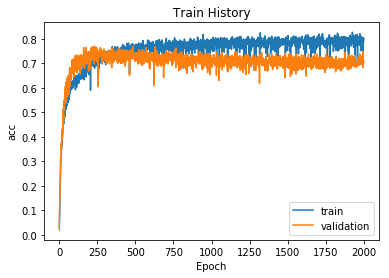

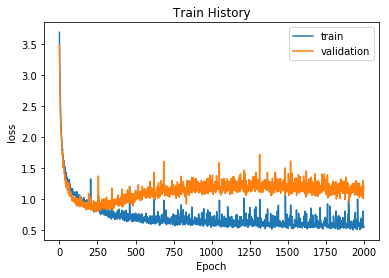

In [131]:
show_train_history(train_history, 'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

In [132]:
scores = model.evaluate(X_test, Y_test)

429/429 [==============================] - 0s 690us/step


In [133]:
scores[1] * 100

67.36596739375507

### Before saving: are you sure?

In [ ]:
model.save_weights("model_10_10_20_tanh_100_1000_50.h5")
#for this
#https://machinelearningmastery.com/save-load-keras-deep-learning-models/

## MUST-SEE: 
* https://www.kaggle.com/randyrose2017/for-beginners-using-keras-to-build-models
* https://medium.com/@pushkarmandot/build-your-first-deep-learning-neural-network-model-using-keras-in-python-a90b5864116d
* https://medium.com/cracking-the-data-science-interview/a-gentle-introduction-to-neural-networks-for-machine-learning-d5f3f8987786
## Just liked:
* https://missinglink.ai/guides/neural-network-concepts/classification-neural-networks-neural-network-right-choice/
## Full-house:
https://towardsdatascience.com/the-mostly-complete-chart-of-neural-networks-explained-3fb6f2367464

### 3.3 Question

* Why rerunning with same configuration gives different output?

# 4. Performance Metrics:

In [ ]:
import h5py

In [ ]:
model_load = Sequential()
model_load.add(Dense(units = 10, 
                input_dim = 71, 
                activation = 'tanh',))
model_load.add(Dense(units = 10, 
                activation = 'tanh'))
model_load.add(Dense(units = 20, 
                activation = 'tanh'))
model_load.add(Dense(units = 42, 
                activation = 'softmax'))

In [ ]:
model_load.load_weights('/home/amanzhol/Documents/Capstone/MAIN Work/models/model_10_10_20_tanh_100_1000_50.h5')

Why do I need to compile before evaluating?

In [ ]:
model_load.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
evaluation = model_load.evaluate(X_test, Y_test)

In [ ]:
evaluation[1] * 100

### State-of-the-art on this dataset (accuarcy)

Results of Ms. Asma Salem

<img src='AsmaSalemResults.png'>

In [ ]:
#model prediction
predictions = model_load.predict(X_test)

In [ ]:
Y_pred = (predictions > 0.5)

In [ ]:
Y_pred

In [ ]:
Y_test

### 4.1 Confusion Matrix

Implementing confustion matrix from source:
https://stackoverflow.com/questions/50920908/get-confusion-matrix-from-a-keras-multiclass-model

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))

In [ ]:
confusion = confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))

### 4.2 FAR, FRR and EER

Source: https://stats.stackexchange.com/questions/272962/are-far-and-frr-the-same-as-fpr-and-fnr-respectively

In [ ]:
type(confusion)

In [ ]:
confusion.shape

<img src='ConfusionMatrix.png'>

<img src='PerformanceMetrics.png'>

> Edit:
this is the format for confusion_matrix():
[[TP,FN]
[FP,TN]]
And classification report gives all this

In [ ]:
confusion[0].shape

In [ ]:
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        if y_actual[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [ ]:
perf_measure(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))

In [ ]:
#Thus
TP = 6
FP = 1
TN = 11
FN = 67

In [ ]:
def FAR(FP, TN):
    return FP/(FP + TN)

def FRR(FN, TP):
    return FN/(FN + TP)

In [ ]:
FAR(FP, TN) * 100

In [ ]:
FRR(FN, TP) * 100

### State-of-the-art on this dataset (Performance Metrics)

Ms. Asma Results
* FAR = 0.3%
* FRR = 1.5%
* EER = 0.9%

### Questions
* How to have several FAR, FRR?

### To read for Confusion Matrix - Get Items FP/FN/TP/TN - Python
* https://datascience.stackexchange.com/questions/28493/confusion-matrix-get-items-fp-fn-tp-tn-python
* https://classeval.wordpress.com/introduction/basic-evaluation-measures/